In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import re

import matplotlib.pyplot as plt
import matplotlib.cm

# # path to epsg
# os.environ['PROJ_LIB'] = '/Users/Danny/anaconda3/pkgs/proj4-5.0.1-h1de35cc_0/share/proj'
# from mpl_toolkits.basemap import Basemap
# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection
# from matplotlib.colors import Normalize

import geopandas as gpd

## Shapefile

In [2]:
mdshapefiledir= '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/bayota/bin/shapefiles/Maryland_Physical_Boundaries__County_Boundaries_Detailed'
fp = os.path.join(mdshapefiledir, 'Maryland_Physical_Boundaries__County_Boundaries_Detailed.shp')

map_df = gpd.read_file(fp)

display(map_df.head(25))

,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,geometry
0,1,Allegany,6,1,1,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-78.34283538536424 39.7222378927649...
1,2,Anne Arundel,5,3,2,2006-04-18T00:00:00.000Z,2006-04-18T00:00:00.000Z,(POLYGON ((-76.60600277481043 39.2291307481439...
2,3,Baltimore,4,27,3,2006-10-09T00:00:00.000Z,2006-10-09T00:00:00.000Z,(POLYGON ((-76.56796379017419 39.6859217936828...
3,4,Baltimore City,0,510,24,2006-04-18T00:00:00.000Z,2009-11-16T00:00:00.000Z,(POLYGON ((-76.52967176269883 39.3719639008103...
4,5,Calvert,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...
5,6,Caroline,2,11,5,2007-05-21T00:00:00.000Z,2008-07-30T00:00:00.000Z,(POLYGON ((-75.74763856546056 39.1418792028996...
6,7,Carroll,7,13,6,2008-06-16T00:00:00.000Z,2012-01-17T00:00:00.000Z,POLYGON ((-76.86866595078828 39.49260703104743...
7,8,Cecil,2,15,7,2006-04-18T00:00:00.000Z,2008-08-20T00:00:00.000Z,(POLYGON ((-75.82726787419014 39.6969286819178...
8,9,Charles,5,17,8,2009-06-08T00:00:00.000Z,2009-06-08T00:00:00.000Z,(POLYGON ((-77.07822688961187 38.6900443135517...
9,10,Dorchester,1,19,9,2007-02-08T00:00:00.000Z,2007-02-22T00:00:00.000Z,(POLYGON ((-75.81564990962002 38.6982484046620...


In [ ]:
# map_df.plot()

## Load Data

In [3]:
output_dir = '/Users/Danny/bayota_ws_0.0.1/output/general/solutions_mdcounties_loadredmax_1milcostbound_20181210'
namelistfile = 'solutions_mdcounties_loadredmax_1milcostbound_20181210.txt'
filelist = os.path.join(output_dir, namelistfile)

with open(os.path.join(output_dir, namelistfile)) as f:
    content = f.readlines()
filelist = [os.path.join(output_dir, x.strip()) for x in content]

In [4]:
dlist = []
for f in filelist:
    tmpdf = pd.read_csv(f)
    tmpdf['solutionname'] = os.path.basename(f)

    #     (pd.DataFrame.assign)(df, solutionname=os.path.basename(filename))

    dlist.append(tmpdf)
df = pd.concat(dlist, ignore_index=True)
display(df.head(2))

df = df.loc[df['acres'] >= 0.5, :]

df['x'] = list(zip(df.bmpshortname,
                   df.landriversegment,
                   df.loadsource,
                   df.totalannualizedcostperunit))

df = df.reset_index()
display(df.head(2))

,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,feasible,solution_objective,totalcostupperbound,solutionname
0,0,3.562565,ConPlan,N24047EL1_5660_0000,lhy,1.94,6.911376,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...
1,1,0.349689,ConPlan,N24047EL1_5660_0000,aop,1.94,0.678396,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...


,index,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,feasible,solution_objective,totalcostupperbound,solutionname,x
0,0,0,3.562565,ConPlan,N24047EL1_5660_0000,lhy,1.94,6.911376,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...,"(ConPlan, N24047EL1_5660_0000, lhy, 1.94)"
1,2,2,12.677125,ConPlan,N24047EL1_5660_0000,ohy,1.94,24.593622,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...,"(ConPlan, N24047EL1_5660_0000, ohy, 1.94)"


In [5]:
from efficiencysubproblem.src.spec_handler import read_spec

# Translate county names
run_spec_dir = '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/bayota/bin/run_specs'
geospecfile = os.path.join(run_spec_dir, 'geography_specs.yaml')
geodict = read_spec(geospecfile)

def getcountyname(solutionnamestring):
#     regexstr = r'''(percentreduction_)(?P<countyname>.*)(_experiment)'''
    regexstr = r'''(loadreductionmax_)(?P<countyname>.*)(_experiment)'''
    p = re.compile(regexstr, re.MULTILINE)

    iterator = p.finditer(solutionnamestring)
    row = None
    for match in iterator:
        if match:
            row = match.group('countyname')
            
    countystatestr = geodict[row]['entities']
    newstr = countystatestr.split(',')[0]
        
    return newstr

punctuationmap = {"Queen Annes": "Queen Anne's",
                  "St Marys": "St. Mary's",
                  "Prince Georges": "Prince George's"}
    
df['countyname'] = df['solutionname'].apply(lambda x: getcountyname(x))
print(df.countyname.unique())

df.loc[df['countyname'].isin(punctuationmap.keys()), 'countyname'] = df['countyname'].map(punctuationmap)
print(df.countyname.unique())
display(df.head(2))
print(df.shape)
print(df.solutionname[0])
print(df.countyname[0])

print(df.solutionname[5600])
print(df.countyname[5600])
# display(df.tail(20))

['Worcester' 'Allegany' 'Anne Arundel' 'Baltimore City' 'Calvert'
 'Caroline' 'Carroll' 'Cecil' 'Charles' 'Dorchester' 'Frederick' 'Garrett'
 'Harford' 'Howard' 'Kent' 'Montgomery' 'Prince Georges' 'Queen Annes'
 'Somerset' 'Talbot' 'Washington' 'Wicomico']
['Worcester' 'Allegany' 'Anne Arundel' 'Baltimore City' 'Calvert'
 'Caroline' 'Carroll' 'Cecil' 'Charles' 'Dorchester' 'Frederick' 'Garrett'
 'Harford' 'Howard' 'Kent' 'Montgomery' "Prince George's" "Queen Anne's"
 'Somerset' 'Talbot' 'Washington' 'Wicomico']


,index,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,feasible,solution_objective,totalcostupperbound,solutionname,x,countyname
0,0,0,3.562565,ConPlan,N24047EL1_5660_0000,lhy,1.94,6.911376,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...,"(ConPlan, N24047EL1_5660_0000, lhy, 1.94)",Worcester
1,2,2,12.677125,ConPlan,N24047EL1_5660_0000,ohy,1.94,24.593622,True,0.0,1000000,solutiondf_modelinstance_loadreductionmax_Worc...,"(ConPlan, N24047EL1_5660_0000, ohy, 1.94)",Worcester


(69704, 14)
solutiondf_modelinstance_loadreductionmax_WorcesterMD_experiment--loadreductionmax_1mil_total_cost_bound--_modifiedvar--totalcostupperbound--_trial0001_20181210_125015.csv
Worcester
solutiondf_modelinstance_loadreductionmax_WorcesterMD_experiment--loadreductionmax_1mil_total_cost_bound--_modifiedvar--totalcostupperbound--_trial0001_20181210_125015.csv
Worcester


## Merge Geo data with Solution data

In [6]:
merged = map_df.set_index('COUNTY').join(df.set_index('countyname'))

In [7]:
display(merged.loc['Calvert', :].head(5))

,OBJECTID,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,geometry,index,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,feasible,solution_objective,totalcostupperbound,solutionname,x
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57390.0,1.0,104.850389,ConPlan,N24009XL0_5345_0000,pas,1.94,203.409754,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5345_0000, pas, 1.94)"
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57391.0,2.0,79.787218,ConPlan,N24009XL0_5345_0000,ohy,1.94,154.787203,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5345_0000, ohy, 1.94)"
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57394.0,5.0,78.800792,ConPlan,N24009XL0_5341_0000,pas,1.94,152.873537,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5341_0000, pas, 1.94)"
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57395.0,6.0,59.964246,ConPlan,N24009XL0_5341_0000,ohy,1.94,116.330637,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5341_0000, ohy, 1.94)"
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57398.0,9.0,115.750435,ConPlan,N24009XL0_5342_0000,pas,1.94,224.555844,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5342_0000, pas, 1.94)"


In [8]:
merged = merged.drop_duplicates(subset=['solutionname'])
display(merged.head(5))

,OBJECTID,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,geometry,index,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,feasible,solution_objective,totalcostupperbound,solutionname,x
Allegany,1,6,1,1,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-78.34283538536424 39.7222378927649...,12783.0,12.0,180.300276,ConPlan,N24001PU1_3940_3970,aop,1.94,349.782536,True,12.061299,1000000.0,solutiondf_modelinstance_loadreductionmax_Alle...,"(ConPlan, N24001PU1_3940_3970, aop, 1.94)"
Anne Arundel,2,5,3,2,2006-04-18T00:00:00.000Z,2006-04-18T00:00:00.000Z,(POLYGON ((-76.60600277481043 39.2291307481439...,26541.0,0.0,9.661677,ConPlan,N24003WM0_3963_0000,pas,1.94,18.743654,True,0.000000,1000000.0,solutiondf_modelinstance_loadreductionmax_Anne...,"(ConPlan, N24003WM0_3963_0000, pas, 1.94)"
Baltimore,3,4,27,3,2006-10-09T00:00:00.000Z,2006-10-09T00:00:00.000Z,(POLYGON ((-76.56796379017419 39.6859217936828...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baltimore City,4,0,510,24,2006-04-18T00:00:00.000Z,2009-11-16T00:00:00.000Z,(POLYGON ((-76.52967176269883 39.3719639008103...,57163.0,29.0,3.690490,InfiltWithSV,N24510WM0_3741_0000,nnr,1248.94,4609.200181,True,59.300613,1000000.0,solutiondf_modelinstance_loadreductionmax_Balt...,"(InfiltWithSV, N24510WM0_3741_0000, nnr, 1248.94)"
Calvert,5,5,9,4,2010-01-28T00:00:00.000Z,2010-01-28T00:00:00.000Z,(POLYGON ((-76.64211863261171 38.7692128951874...,57390.0,1.0,104.850389,ConPlan,N24009XL0_5345_0000,pas,1.94,203.409754,True,30.994934,1000000.0,solutiondf_modelinstance_loadreductionmax_Calv...,"(ConPlan, N24009XL0_5345_0000, pas, 1.94)"


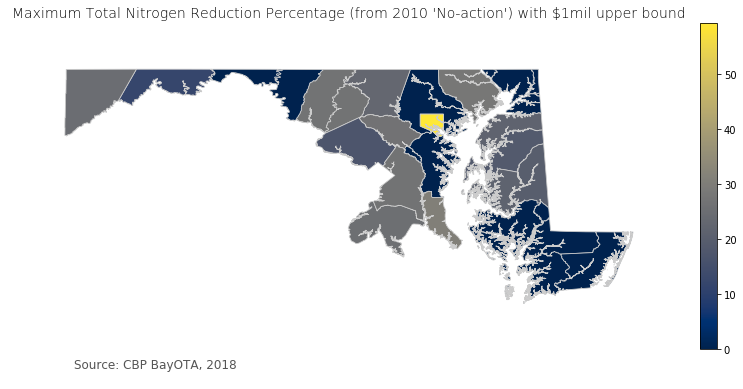

In [11]:
# from bayota_settings.config_script import get_graphics_dir

# set a variable that will call whatever column we want to visualise on the map
variable = 'solution_objective'
# set the range for the choropleth
vmin, vmax = 0, merged[variable].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14, 6))
lims = plt.axis('equal')

merged.plot(column=variable, cmap='cividis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# other colormap ideas: Blues, viridis, cividis, plasma

# remove the axis
ax.axis('off')

# add a title
# titlestr = "Total cost for a 10% Total Nitrogen Reduction (from 2010 'No-action')"
titlestr = "Maximum Total Nitrogen Reduction Percentage (from 2010 'No-action') with $1mil upper bound"
ax.set_title(titlestr, fontdict={'fontsize': '14', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate("Source: CBP BayOTA, 2018",
            xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, color='#555555')

# Save the map

# Save the map
fig.savefig("map_export_new.png",
            bbox_inches='tight', dpi=300)
# fig.savefig(os.path.join(get_graphics_dir(), "map_export_new.png"),
#             bbox_inches='tight', dpi=300)